Chapter 18
# 可视化单位球体几何转换
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [6]:
def plot_implicit(fn, X_plot, Y_plot, Z_plot, ax, bbox, filename):
    
    # 等高线的起止范围
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3

    ax.set_proj_type('ortho')
    
    # 绘制三条参考线
    k = 1.5
    ax.plot((xmin * k, xmax * k), (0, 0), (0, 0), 'k', lw = 0.1)
    ax.plot((0, 0), (ymin * k, ymax * k), (0, 0), 'k', lw = 0.1)
    ax.plot((0, 0), (0, 0), (zmin * k, zmax * k), 'k', lw = 0.1)
    
    # 等高线的分辨率
    A = np.linspace(xmin, xmax, 500) 
    # 产生网格数据
    A1,A2 = np.meshgrid(A,A)
    
    # 等高线的分割位置
    B = np.linspace(xmin, xmax, 40) 
    
    # 绘制 XY 平面等高线
    if X_plot == True:
        for z in B:
            X,Y = A1,A2
            Z = fn(X,Y,z)
            cset = ax.contour(X, Y, Z+z, [z], 
                              zdir='z', 
                              linewidths = 0.25,
                              colors = '#0066FF', 
                              linestyles = 'solid')

    # 绘制 XZ 平面等高线
    if Y_plot == True:
        for y in B: 
            X,Z = A1,A2
            Y = fn(X,y,Z)
            cset = ax.contour(X, Y+y, Z, [y], 
                              zdir='y', 
                              linewidths = 0.25,
                              colors = '#88DD66', 
                              linestyles = 'solid')
    
    # 绘制 YZ 平面等高线
    if Z_plot == True:
        for x in B: 
            Y,Z = A1,A2
            X = fn(x,Y,Z)
            cset = ax.contour(X+x, Y, Z, [x], 
                              zdir='x', 
                              linewidths = 0.25,
                              colors = '#FF6600', 
                              linestyles = 'solid')

    ax.quiver(0, 0, 0, 
              xmax, 0, 0,
              length = 1, 
              color = 'r',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25)

    ax.quiver(0, 0, 0, 
              0, ymax, 0,
              length = 1, 
              color = 'g',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25)

    ax.quiver(0, 0, 0, 
              0, 0, zmax,
              length = 1, 
              color = 'b',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25)
    
    ax.set_zlim(zmin * k,zmax * k)
    ax.set_xlim(xmin * k,xmax * k)
    ax.set_ylim(ymin * k,ymax * k)
    ax.set_box_aspect([1,1,1]) 
    ax.view_init(azim=60, elev=30)
    ax.axis('off')
    fig.savefig('Figures/' + filename + '.svg', format='svg')

In [ ]:
# 缩放 > 旋转
# xT @ x = 1
# A@x = z, A = V @ S
# x = inv(A) @ z
# zT @ inv(A @ AT) z = 1

## 单位球

C:\Users\james\AppData\Local\Temp\ipykernel_16276\7596205.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


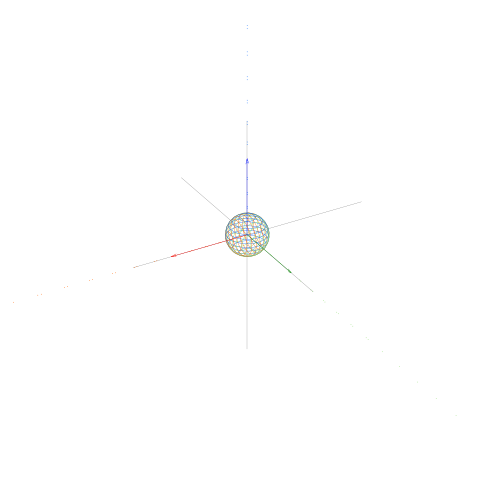

In [7]:
Identity = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])
A = Identity
def unit(x,y,z):
    
    f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
    
    return f[0,0] - 1

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
plot_implicit(unit, True, True, True, ax, (-4,4), '单位球')

C:\Users\james\AppData\Local\Temp\ipykernel_16276\1555199623.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


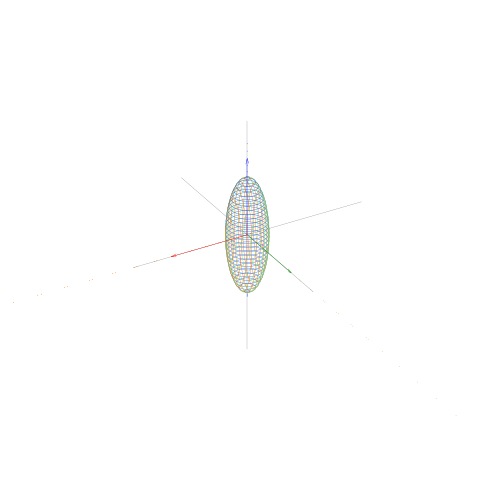

In [10]:
alpha = np.deg2rad(45)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

S_z = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 3]])
# A@x = z, A = V @ S
A = S_z 

def scale_z_rotate_x(x,y,z):
    
    f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
    
    return f[0,0] - 1

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
plot_implicit(scale_z_rotate_x, True, True, True, ax, (-4,4), '缩放')

C:\Users\james\AppData\Local\Temp\ipykernel_16276\1429942179.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


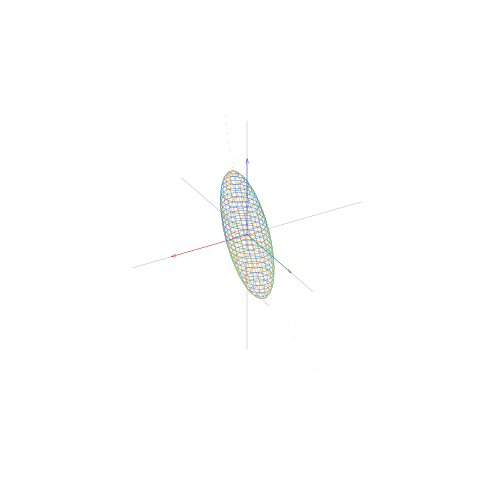

In [12]:
S_z = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 3]])

alpha = np.deg2rad(30)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

A = R_x @ S_z

def scale_z_rotate_x(x,y,z):
    
    f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
    
    return f[0,0] - 1

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
plot_implicit(scale_z_rotate_x, True, True, True, ax, (-4,4), '缩放 --- x旋转')

C:\Users\james\AppData\Local\Temp\ipykernel_16276\871422812.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


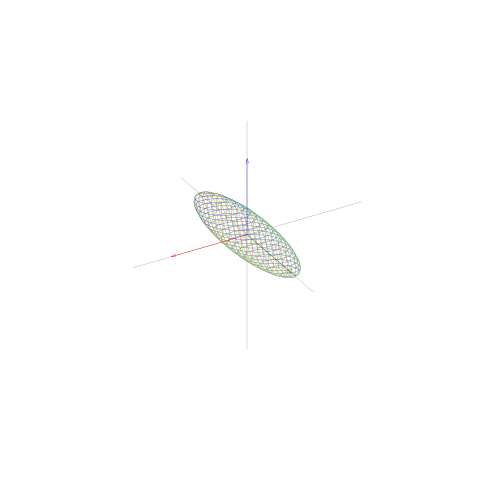

In [13]:
S_z = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 3]])

alpha = np.deg2rad(30)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

beta = np.deg2rad(45)

# 从 y 正方向看
R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                [0,            1, 0],
                [-np.sin(beta),0, np.cos(beta)]])


A = R_y @ R_x @ S_z

def scale_z_rotate_x_y(x,y,z):
    
    f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
    
    return f[0,0] - 1

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
plot_implicit(scale_z_rotate_x_y, True, True, True, ax, (-4,4), '缩放 --- xy旋转')

C:\Users\james\AppData\Local\Temp\ipykernel_16276\780611931.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_16276\2285289889.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


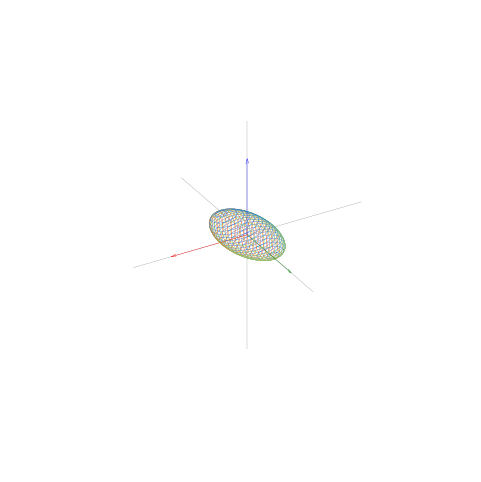

In [14]:
S_z = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 3]])

alpha = np.deg2rad(30)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

beta = np.deg2rad(45)

# 从 y 正方向看
R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                [0,            1, 0],
                [-np.sin(beta),0, np.cos(beta)]])

gamma = np.deg2rad(60)

R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                [np.sin(gamma),  np.cos(gamma), 0],
                [0,              0,             1]])

A = R_z @ R_y @ R_x @ S_z

def scale_z_rotate_x_y_z(x,y,z):
    
    f = [[x, y, z]] @ np.linalg.pinv(A @ A.T) @ [[x], [y], [z]]
    
    return f[0,0] - 1

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
plot_implicit(scale_z_rotate_x_y_z, True, True, True, ax, (-4,4), '缩放 --- xyz旋转')